In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [145]:
smartwatches = pd.read_csv("smartwatches.csv")

In [146]:
smartwatches.head()


,Unnamed: 0,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


#Обнаружение пропусков
Рассмотрим несколько способов
1. Визуализация пропущеных данных с помощью тепловой карты

<AxesSubplot:>

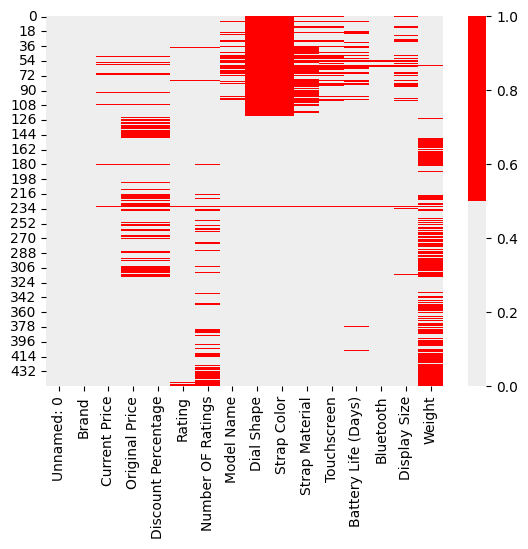

In [147]:
cols = smartwatches.columns[:] 
# определяем цвета 
# красный - пропущенные данные
colours = ['#eeeeee', '#ff0000']
sns.heatmap(smartwatches[cols].isnull(), cmap=sns.color_palette(colours))

2. Проверяем на наличие нулевых значений

In [148]:
smartwatches.isnull().any() 

Unnamed: 0             False
Brand                  False
Current Price           True
Original Price          True
Discount Percentage     True
Rating                  True
Number OF Ratings       True
Model Name              True
Dial Shape              True
Strap Color             True
Strap Material          True
Touchscreen             True
Battery Life (Days)     True
Bluetooth               True
Display Size            True
Weight                  True
dtype: bool

3. Подсчитаем количество нулевых значений по столбцам

In [149]:
for col in smartwatches.columns:
    pct_missing = smartwatches[col].isnull().sum()
    print('{} - {}'.format(col, round(pct_missing)))

Unnamed: 0 - 0
Brand - 0
Current Price - 10
Original Price - 73
Discount Percentage - 73
Rating - 6
Number OF Ratings - 59
Model Name - 35
Dial Shape - 123
Strap Color - 123
Strap Material - 69
Touchscreen - 37
Battery Life (Days) - 32
Bluetooth - 6
Display Size - 30
Weight - 186


In [150]:
smartwatches.drop(['Original Price', 'Discount Percentage', "Number OF Ratings", 'Rating'], axis=1, inplace=True)

In [151]:
smartwatches

,Unnamed: 0,Brand,Current Price,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,0,noise,82990.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,1,fire-boltt,3799.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,2,boat,1999.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,3,fire-boltt,1799.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,4,noise,1599.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g
...,...,...,...,...,...,...,...,...,...,...,...,...
445,445,fire-boltt,5999.0,bsw003,Circle,Grey,Silicon,Yes,22.0,Yes,1.3 inches,NaN
446,446,fire-boltt,3700.0,beast pro,Square,Black,Silicon,Yes,8.0,Yes,0.1 inches,NaN
447,447,fire-boltt,5999.0,bsw003,Circle,Gold,Silicon,Yes,22.0,Yes,1.3 inches,NaN
448,448,fire-boltt,3200.0,call 2,Square,Blue,Silicon,Yes,22.0,Yes,0.1 inches,NaN


In [152]:
smartwatches = smartwatches.dropna(subset=['Dial Shape'])

In [153]:
smartwatches

,Unnamed: 0,Brand,Current Price,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
122,122,apple,29650.0,Watch SE GPS (2nd Gen),Rectangle,Midnight,Silicon,Yes,22.0,Yes,1.6 inches,<= 20 g
123,123,apple,37900.0,Watch SE GPS + Cellular (2nd Gen),Rectangle,Starlight Sport,Silicon,Yes,22.0,Yes,1.7 inches,<= 20 g
124,124,apple,23349.0,"Watch Series 3 (GPS, 42mm) - Space Grey Alumin...",Rectangle,Black,Silicon,Yes,22.0,Yes,1.7 inches,NaN
125,125,apple,33900.0,Watch SE GPS + Cellular,Rectangle,Pink,Silicon,Yes,22.0,Yes,1.6 inches,<= 20 g
126,126,apple,89900.0,Watch Ultra GPS + Cellular,Rectangle,Orange Alpine,Fabric,Yes,3.5,Yes,1.9 inches,75g +
...,...,...,...,...,...,...,...,...,...,...,...,...
445,445,fire-boltt,5999.0,bsw003,Circle,Grey,Silicon,Yes,22.0,Yes,1.3 inches,NaN
446,446,fire-boltt,3700.0,beast pro,Square,Black,Silicon,Yes,8.0,Yes,0.1 inches,NaN
447,447,fire-boltt,5999.0,bsw003,Circle,Gold,Silicon,Yes,22.0,Yes,1.3 inches,NaN
448,448,fire-boltt,3200.0,call 2,Square,Blue,Silicon,Yes,22.0,Yes,0.1 inches,NaN


<AxesSubplot:>

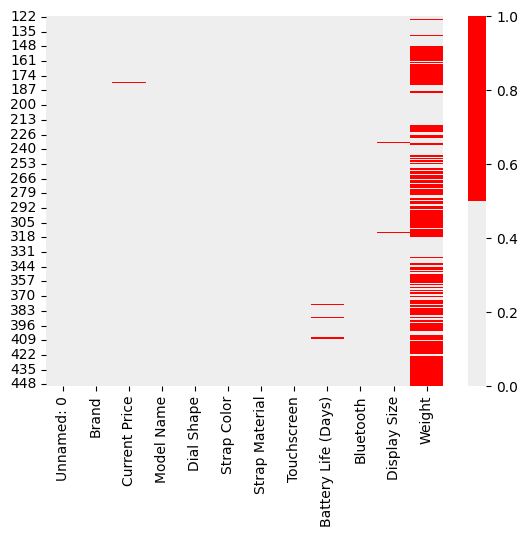

In [154]:
cols = smartwatches.columns[:] 
colours = ['#eeeeee', '#ff0000']
sns.heatmap(smartwatches[cols].isnull(), cmap=sns.color_palette(colours))

In [155]:
smartwatches = smartwatches.dropna(subset=['Display Size', 'Battery Life (Days)', 'Current Price'])


In [156]:
smartwatches.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 122 to 449
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           321 non-null    int64  
 1   Brand                321 non-null    object 
 2   Current Price        321 non-null    float64
 3   Model Name           321 non-null    object 
 4   Dial Shape           321 non-null    object 
 5   Strap Color          321 non-null    object 
 6   Strap Material       321 non-null    object 
 7   Touchscreen          321 non-null    object 
 8   Battery Life (Days)  321 non-null    float64
 9   Bluetooth            321 non-null    object 
 10  Display Size         321 non-null    object 
 11  Weight               141 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 193.7 KB


In [157]:
# smartwatches.loc['Display Size'] = smartwatches['Display Size'].astype(str)
# smartwatches.loc['Weight'] = smartwatches['Weight'].astype(str)


In [158]:
smartwatches.loc[:, 'Display Size'] = smartwatches['Display Size'].astype(str).str.replace(' inches', '').astype(float)

def handle_weight_range(weight):
    if '-' in weight:
        weights = weight.split('-')
        return (float(weights[0]) + float(weights[1])) / 2
    else:
        return float(weight)

smartwatches.loc[:, 'Weight'] = smartwatches['Weight'].astype(str).str.replace('g', '').str.replace('<= ', '').str.replace('+', '').apply(handle_weight_range)


C:\Users\Chamster\AppData\Local\Temp\ipykernel_23080\290482760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smartwatches.loc[:, 'Display Size'] = smartwatches['Display Size'].astype(str).str.replace(' inches', '').astype(float)
C:\Users\Chamster\AppData\Local\Temp\ipykernel_23080\290482760.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  smartwatches.loc[:, 'Weight'] = smartwatches['Weight'].astype(str).str.replace('g', '').str.replace('<= ', '').str.replace('+', '').apply(handle_weight_range)
C:\Users\Chamster\AppData\Local\Temp\ipykernel_23080\290482760.py:10: SettingWithCopyWar

In [159]:
average_weights = smartwatches.groupby('Display Size')['Weight'].mean()

smartwatches['Weight'] = smartwatches.apply(
    lambda row: average_weights[row['Display Size']] if pd.isnull(row['Weight']) and pd.notnull(row['Display Size']) else row['Weight'],
    axis=1
)


C:\Users\Chamster\AppData\Local\Temp\ipykernel_23080\1172629742.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smartwatches['Weight'] = smartwatches.apply(


In [160]:
smartwatches.dtypes

Unnamed: 0               int64
Brand                   object
Current Price          float64
Model Name              object
Dial Shape              object
Strap Color             object
Strap Material          object
Touchscreen             object
Battery Life (Days)    float64
Bluetooth               object
Display Size           float64
Weight                 float64
dtype: object

<AxesSubplot:>

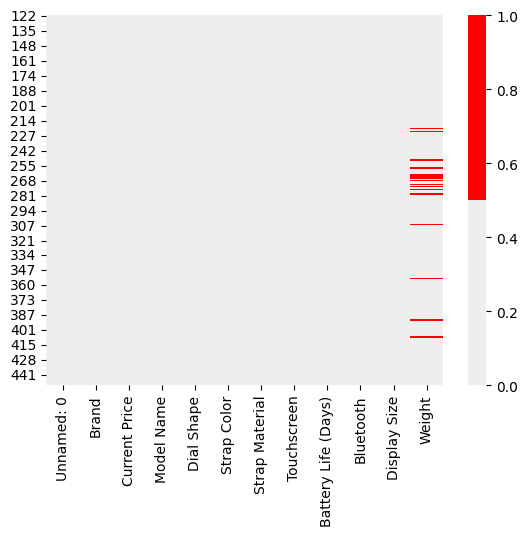

In [161]:
cols = smartwatches.columns[:] 
colours = ['#eeeeee', '#ff0000']
sns.heatmap(smartwatches[cols].isnull(), cmap=sns.color_palette(colours))

In [162]:
empty_weight_rows = smartwatches[smartwatches['Weight'].isna()]
print(empty_weight_rows.to_string())


     Unnamed: 0      Brand  Current Price                                                                        Model Name Dial Shape   Strap Color Strap Material Touchscreen  Battery Life (Days) Bluetooth  Display Size  Weight
221         221     fitbit         8999.0                                                                         Inspire 3  Rectangle  Morning Glow        Silicon         Yes                 22.0       Yes           0.6     NaN
223         223     fitbit        17699.0                                                                           Versa 3     Curved         Black         Rubber         Yes                 17.5       Yes          15.9     NaN
250         250    amazfit         7200.0                                                                          Bip Lite     Square         Black        Silicon         Yes                  3.5       Yes           3.0     NaN
257         257     garmin        39490.0        Venu 2, GPS Smartwatch, AMOLED Disp

In [163]:
# smartwatches = smartwatches.drop(smartwatches[(smartwatches['Display Size'].notna()) & (smartwatches['Weight'].isna())].index)


<AxesSubplot:>

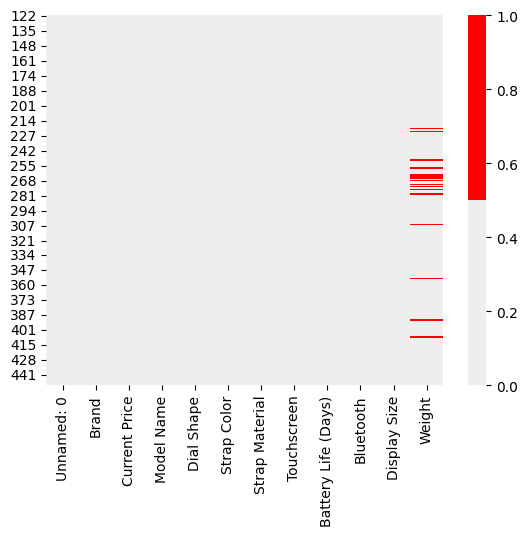

In [164]:
cols = smartwatches.columns[:] 
colours = ['#eeeeee', '#ff0000']
sns.heatmap(smartwatches[cols].isnull(), cmap=sns.color_palette(colours))

In [165]:
# smartwatches = smartwatches.dropna(subset=['Weight'])

In [166]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in ['Brand', 'Model Name', 'Dial Shape', 'Strap Color', 'Strap Material', 'Touchscreen', 'Bluetooth']:
    smartwatches.loc[:, column] = le.fit_transform(smartwatches[column])


C:\Users\Chamster\AppData\Local\Temp\ipykernel_23080\992826152.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smartwatches.loc[:, column] = le.fit_transform(smartwatches[column])
C:\Users\Chamster\AppData\Local\Temp\ipykernel_23080\992826152.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smartwatches.loc[:, column] = le.fit_transform(smartwatches[column])
C:\Users\Chamster\AppData\Local\Temp\ipykernel_23080\992826152.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [169]:
smartwatches.dtypes

Unnamed: 0               int64
Brand                    int32
Current Price          float64
Model Name               int32
Dial Shape               int32
Strap Color              int32
Strap Material           int32
Touchscreen              int32
Battery Life (Days)    float64
Bluetooth                int32
Display Size           float64
Weight                 float64
dtype: object

In [168]:
smartwatches.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 122 to 449
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           321 non-null    int64  
 1   Brand                321 non-null    int32  
 2   Current Price        321 non-null    float64
 3   Model Name           321 non-null    int32  
 4   Dial Shape           321 non-null    int32  
 5   Strap Color          321 non-null    int32  
 6   Strap Material       321 non-null    int32  
 7   Touchscreen          321 non-null    int32  
 8   Battery Life (Days)  321 non-null    float64
 9   Bluetooth            321 non-null    int32  
 10  Display Size         321 non-null    float64
 11  Weight               302 non-null    float64
dtypes: float64(4), int32(7), int64(1)
memory usage: 23.8 KB
